In [19]:
from google.colab import files
files.upload()

Saving Book1.xlsx to Book1.xlsx


{'Book1.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00q\x0e9+p\x01\x00\x00\xa0\x05\x00\x00\x13\x00\xdb\x01[Content_Types].xml \xa2\xd7\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
train = pd.read_excel('Book1.xlsx')
train.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [53]:
train.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [0]:
train['last_name']=train['last_name'].fillna(method='ffill')

In [0]:
train['DOB']=train['DOB'].fillna(method='ffill')

In [56]:
train['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
Legal Assistant                         41
General Manager                         40
Associate Professor                     39
Structural Engineer                     39
Desktop Support Technician              38
Sales Representative                    38
Junior Executive                        38
Senior Financial Analyst                37
Chemical Engineer                       37
Dental Hygienist                        37
Executive Secretary                     37
Technical Writer                        37
Cost Accountant                         36
Product Engineer                        36
Assistant Professor                     36
Registered Nurse                        36
Senior Developer                        36
Food Chemist                            35
VP Product 

In [0]:
train['job_title']=train['job_title'].fillna(method='bfill')

In [58]:
train['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [0]:
train['job_industry_category']=train['job_industry_category'].fillna(method='ffill')

In [0]:
del train['default']

In [61]:
train['tenure'].mean()


10.65704063378482

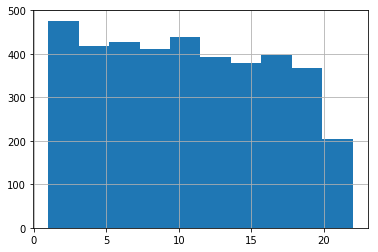

In [62]:
train['tenure'].hist()

In [0]:
train['tenure']=train['tenure'].fillna(train['tenure'].mean())

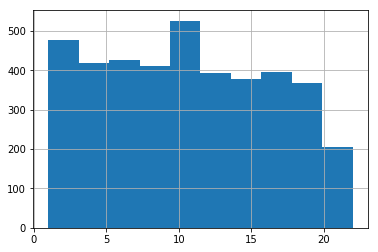

In [64]:
train['tenure'].hist()

In [65]:
train.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [66]:
submission = pd.DataFrame({
        "customer_id": train["customer_id"],
        "first_name": train["first_name"],
        "last_name": train["last_name"],
        "gender": train["gender"],
        "past_3_years_bike_related_purchases": train["past_3_years_bike_related_purchases"],
        "DOB": train["DOB"],
        "job_title": train["job_title"],
        "job_industry_category": train["job_industry_category"],
        "wealth_segment": train["wealth_segment"],
        "deceased_indicator": train["deceased_indicator"],
        "owns_car": train["owns_car"],
        "tenure": train["tenure"]
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

   customer_id      first_name  last_name  ... deceased_indicator  owns_car tenure
0            1         Laraine  Medendorp  ...                  N       Yes   11.0
1            2             Eli    Bockman  ...                  N       Yes   16.0
2            3           Arlin     Dearle  ...                  N       Yes   15.0
3            4          Talbot     Dearle  ...                  N        No    7.0
4            5  Sheila-kathryn     Calton  ...                  N       Yes    8.0
5            6            Curr  Duckhouse  ...                  N       Yes   13.0
6            7            Fina     Merali  ...                  N       Yes   11.0
7            8             Rod      Inder  ...                  N        No    7.0
8            9            Mala       Lind  ...                  N       Yes    8.0
9           10        Fiorenze    Birdall  ...                  N       Yes   20.0

[10 rows x 12 columns]


In [0]:
from google.colab import files
files.download('submission.csv')